In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit.models import LorentzianModel

In [53]:
data = np.loadtxt('CNdata04icorrline90.dat.txt')
endpoints = data[[0,-1],:]
x = data[:,0]
y = data[:,1]
print(endpoints)

[[  370.096  20499.75  ]
 [  393.4319 18022.62  ]]


Subtracting the background

In [65]:
def linear_background(x, endpoints=endpoints):
    delta_x = endpoints[-1, 0] - endpoints[0, 0]
    delta_y = endpoints[-1, -1] - endpoints[0, -1]
    
    m = delta_y / delta_x
    b1 = endpoints[0, 1] - m * endpoints[0, 0]
    b2 = endpoints[1, 1] - m * endpoints[1, 0]
    try:
        assert np.allclose(b1, b2)
    except AssertionError:
        print(f"b1:\t{b1}")
        print(f"b2:\t{b2}")
    print(f"Slope:\t\t{m:0.3f}")
    print(f"Intercept:\t{b1:0.3f}")
    
    return m * x + b1

In [66]:
linear_background(x)

Slope:		-106.151
Intercept:	59785.824


array([20499.75      , 20497.32975634, 20494.90951268, ...,
       18027.46048732, 18025.04024366, 18022.62      ])

Slope:		-106.151
Intercept:	59785.824


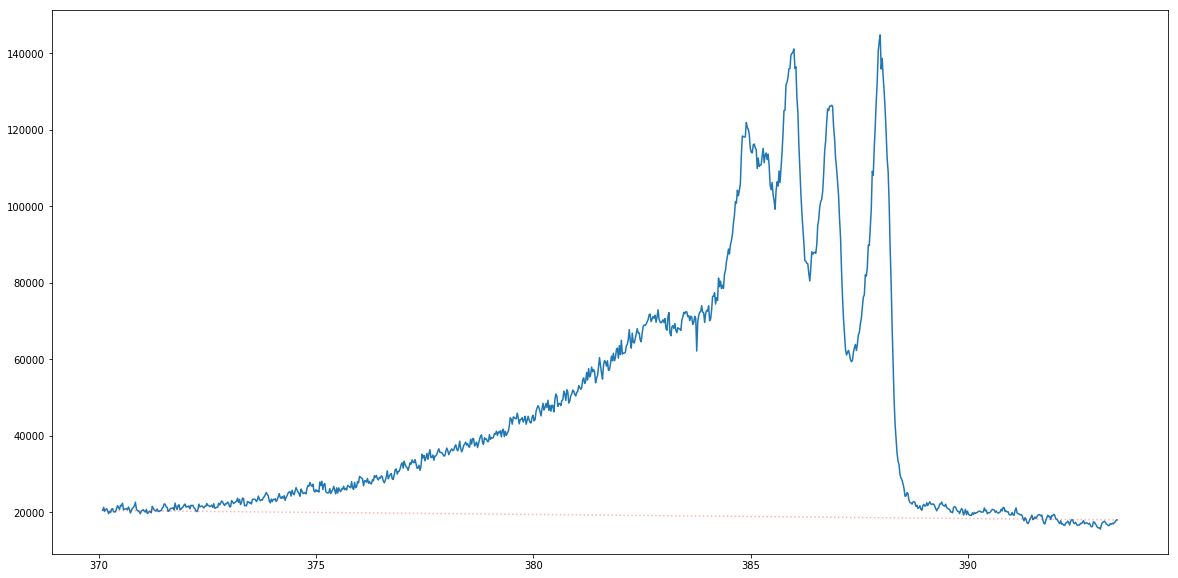

In [67]:
plt.figure(figsize=(20, 10))
plt.plot(x, y)
plt.plot(x, linear_background(x), "r:", alpha=0.3)

Now plot with linear background removed

Slope:		-106.151
Intercept:	59785.824


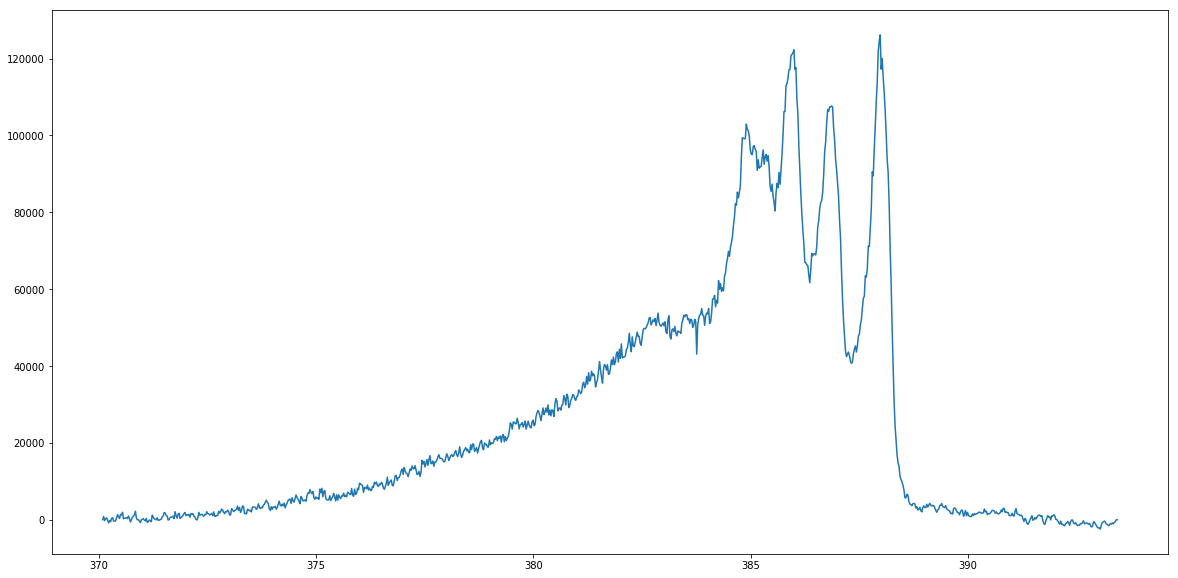

In [68]:
y -= linear_background(x)
plt.figure(figsize=(20, 10))
plt.plot(x, y)

In [80]:
# save these
nobg_data = np.hstack([np.atleast_2d(x).T, np.atleast_2d(y).T])
np.savetxt('bg_removed_cn.dat', nobg_data)

Looks like there is a peak that begins somewhere around 387nm

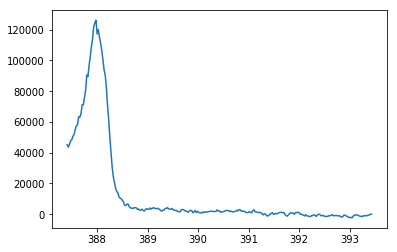

In [69]:
plt.plot(x[x > 387.4], y[x > 387.4])

In [70]:
xx = x[np.where(x > 387.8)]
yy = y[np.where(x > 387.8)]

In [71]:
mod = LorentzianModel()
pars = mod.guess(yy, xx)
out = mod.fit(yy, pars, x=xx)
print(out.fit_report())

[[Model]]
    Model(lorentzian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 247
    # variables        = 3
    chi-square         = 3.3088e+09
    reduced chi-square = 13560493.1
    Akaike info crit   = 4059.38142
    Bayesian info crit = 4069.90959
[[Variables]]
    sigma:      0.20235311 +/- 0.00404908 (2.00%) (init = 0.1939)
    center:     387.985688 +/- 0.00258755 (0.00%) (init = 388.0143)
    amplitude:  83246.4070 +/- 1243.14819 (1.49%) (init = 93520.4)
    fwhm:       0.40470622 +/- 0.00809810 (2.00%) == '2.0000000*sigma'
    height:     130950.079 +/- 1445.48130 (1.10%) == '0.3183099*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, amplitude)  =  0.839
    C(center, amplitude) = -0.376
    C(sigma, center)     = -0.344



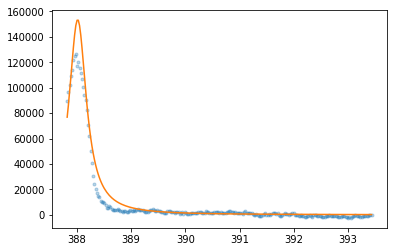

In [72]:
plt.plot(xx, yy, ".", alpha=0.3)
plt.plot(xx, mod.eval(pars, x=xx))

Further, the 193.09-nm CI line appears to be measured in 2-nd order, infer the FWHM of this line.

In [73]:
193.09*2

386.18